In [420]:
import FinanceDataReader as fdr
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import pickle
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [421]:
dt_list1 = ['2023-01-02','2023-01-03','2023-01-04','2023-01-05','2023-01-06','2023-01-09','2023-01-10','2023-01-11','2023-01-12','2023-01-13','2023-01-16',\
            '2023-01-17','2023-01-18','2023-01-19','2023-01-20','2023-01-25','2023-01-26','2023-01-27','2023-01-30','2023-01-31']
dt_list2 = ['2023-02-01','2023-02-02','2023-02-03','2023-02-06','2023-02-07','2023-02-08','2023-02-09','2023-02-10','2023-02-13','2023-02-14','2023-02-15','2023-02-16','2023-02-17',\
            '2023-02-20']
dt_list = dt_list1 + dt_list2 

In [422]:
df_all = pd.DataFrame()

for dt in dt_list:
    kq_yymmdd = pd.read_pickle('kq_selection_' + str(dt) + '.pkl')['name']
    for code in list(kq_yymmdd.index):
        start_dt = dt
        end_dt = datetime.datetime.strptime(dt, '%Y-%m-%d') + BDay(10)
        df = fdr.DataReader(code, start=start_dt, end=end_dt) 
        df = df.head(6)
        df['code'] = code
        df['name'] = kq_yymmdd.loc[code]
        df['select_dt'] = dt 
        df = df.reset_index().set_index('select_dt')[['Date','code','name','Open','High','Low','Close','Volume']]
        df_all = pd.concat([df_all, df], axis=0)

In [423]:
df_all.to_pickle('backtesting.pkl')

In [424]:
df_all = pd.read_pickle('backtesting.pkl')
c1 = df_all.groupby(['select_dt','name'])[['name','Close']].first(1)
c2 = df_all.groupby(['select_dt','name'])[['Open']].nth(1)
c3 = df_all.groupby(['select_dt','name'])[['High']].nth([1,2,3,4,5]).groupby(['select_dt','name']).max()
c4 = df_all.groupby(['select_dt','name'])[['Low']].nth([1,2,3,4,5]).groupby(['select_dt','name']).min()
c5 = df_all.groupby(['select_dt','name'])[['name','Close']].nth(5)

c_all = pd.concat([c1, c2, c3, c4, c5], axis=1)
c_all['max_return'] = c_all['High']/c_all['Open']
c_all['min_return'] = c_all['Low']/c_all['Open']

In [425]:
c_all.to_excel('hyungbong.xlsx')

Text(0.5, 0, 'Return')

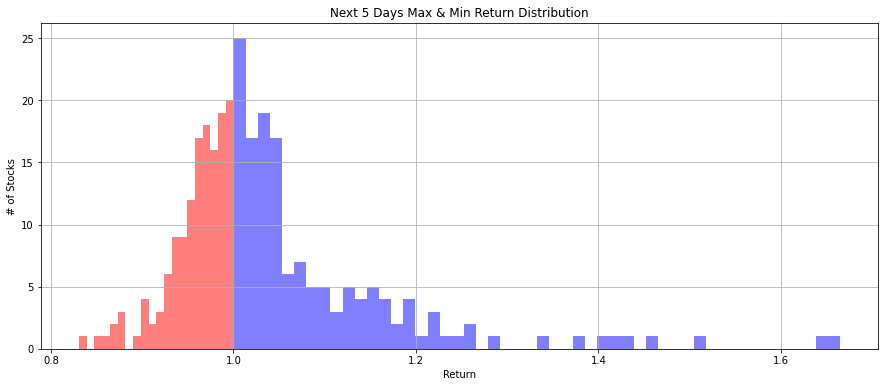

In [375]:
c_all[c_all['min_return']>0]['min_return'].hist(bins=20, figsize=(15,6), color='red', alpha=0.5)
c_all[c_all['max_return']>0]['max_return'].hist(bins=50, figsize=(15,6), color='blue', alpha=0.5)
plt.title('Next 5 Days Max & Min Return Distribution')
plt.ylabel('# of Stocks')
plt.xlabel('Return')

In [376]:
c_all[c_all['min_return']>0]['min_return'].describe(percentiles=[0.05, 0.1, 0.9, 0.95])

count    144.000000
mean       0.959217
std        0.033934
min        0.830671
5%         0.883327
10%        0.915335
50%        0.967145
90%        0.993652
95%        0.997786
max        1.000000
Name: min_return, dtype: float64

In [139]:
# b1 =  df_all.groupby(['select_dt','name'])[['name','Low','High']].first(1).apply(lambda x: x['High'] - x['Low'], axis=1)
# b2 = df_all.groupby(['select_dt','name'])[['Open','High']].nth(1)
# b3 = df_all.groupby(['select_dt','name'])['Open'].nth(2)

In [170]:
price_range = df_all.groupby(['select_dt','name']).first()[['Low','High']].apply(lambda x: (x['High'] -x['Low']), axis=1)

In [173]:
open_price = df_all.groupby(['select_dt','name']).nth(1)['Open'] 
min_price

In [306]:
#'322180''086960'
s = fdr.DataReader('086960', start='2022-11-01', end='2023-02-10') 
s.index = [d.strftime('%y-%m-%d') for d in (s['Close'].index)]

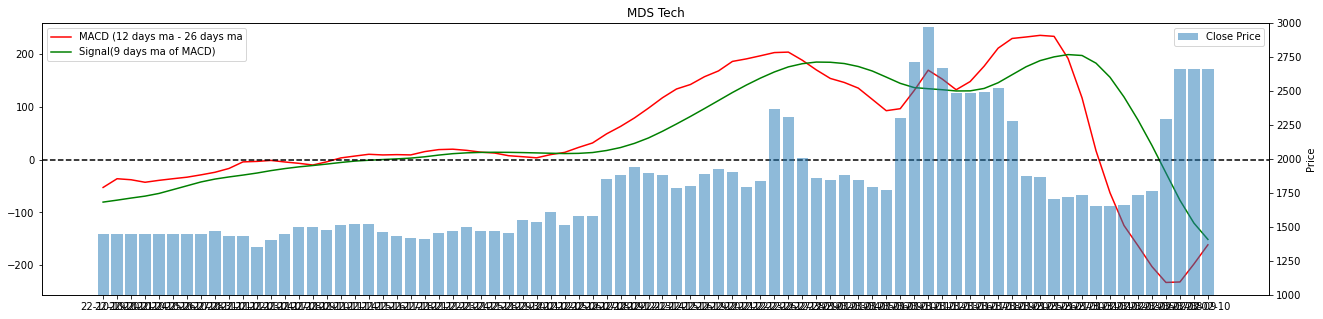

In [350]:
s = fdr.DataReader('086960', start='2022-08-01', end='2023-02-10') 
s.index = [d.strftime('%y-%m-%d') for d in (s['Close'].index)]
i = 80
fig, ax = plt.subplots(figsize=(22,5))
plt.title('MDS Tech')
ma12 = s['Close'].rolling(12).mean()
ma26 = s['Close'].rolling(26).mean()
macd = ma12 - ma26
signal = macd.rolling(9).mean()

ax.plot(macd.tail(i), color='red', label='MACD (12 days ma - 26 days ma')
ax.plot(signal.tail(i), color='green', label='Signal(9 days ma of MACD)')
ax.axhline(0, color='black', linestyle='--')
ax2 = ax.twinx()
ax2.bar(height=s['Close'].tail(i), x=s.tail(i).index, label='Close Price', alpha=0.5)
ax.legend(loc=2)
ax2.legend(loc=1)
ax2.set_ylim(1000, 3000)
ax2.set_ylabel('Price')
plt.show()

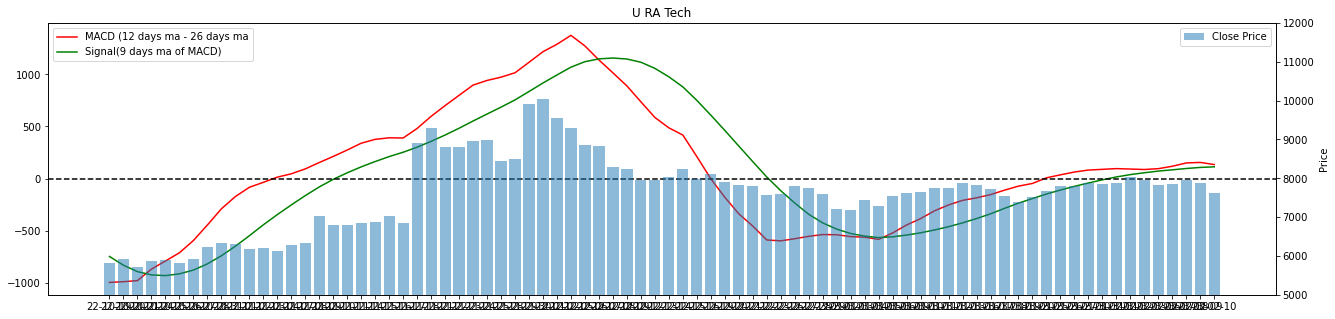

In [349]:
fig, ax = plt.subplots(figsize=(22,5))
plt.title('U RA Tech')
s = fdr.DataReader('048430', start='2022-08-01', end='2023-02-10') 
i = 80
s.index = [d.strftime('%y-%m-%d') for d in (s['Close'].index)]
ma12 = s['Close'].rolling(12).mean()
ma26 = s['Close'].rolling(26).mean()
macd = ma12 - ma26
signal = macd.rolling(9).mean()
ax.plot(macd.tail(i), color='red', label='MACD (12 days ma - 26 days ma')
ax.plot(signal.tail(i), color='green', label='Signal(9 days ma of MACD)')
ax.axhline(0, color='black', linestyle='--')
ax2 = ax.twinx()
ax2.bar(height=s['Close'].tail(i), x=s.tail(i).index, label='Close Price', alpha=0.5)
ax.legend(loc=2)
ax2.legend(loc=1)
ax2.set_ylim(5000, 12000)
ax2.set_ylabel('Price')
plt.show()

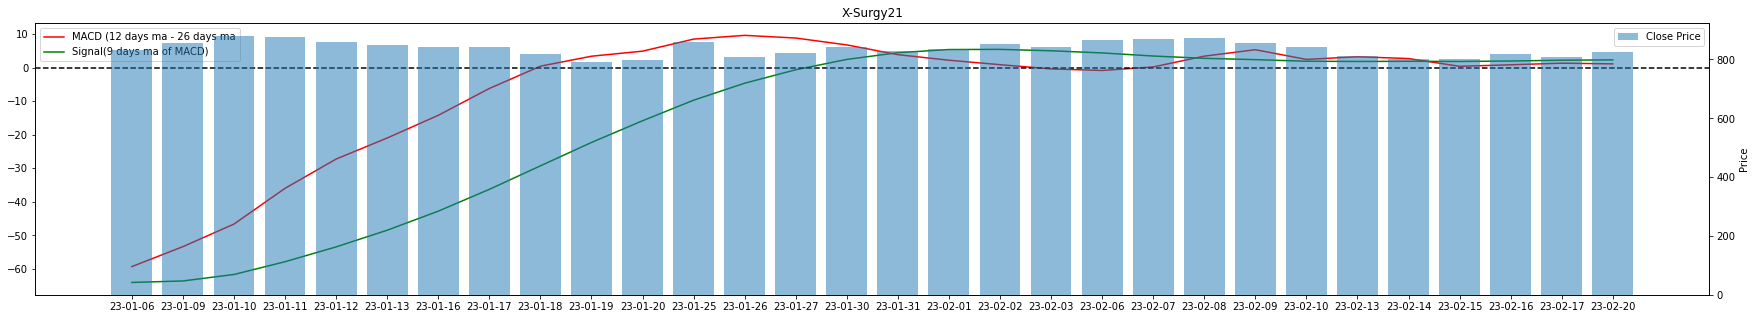

In [431]:
s = fdr.DataReader('192410', start='2022-08-01', end='2023-02-20') 
s.index = [d.strftime('%y-%m-%d') for d in (s['Close'].index)]
i = 30
fig, ax = plt.subplots(figsize=(30,5))
plt.title('X-Surgy21')
ma12 = s['Close'].rolling(12).mean()
ma26 = s['Close'].rolling(26).mean()
macd = ma12 - ma26
signal = macd.rolling(9).mean()

ax.plot(macd.tail(i), color='red', label='MACD (12 days ma - 26 days ma')
ax.plot(signal.tail(i), color='green', label='Signal(9 days ma of MACD)')
ax.axhline(0, color='black', linestyle='--')
ax2 = ax.twinx()
ax2.bar(height=s['Close'].tail(i), x=s.tail(i).index, label='Close Price', alpha=0.5)
ax.legend(loc=2)
ax2.legend(loc=1)
ax2.set_ylabel('Price')
plt.show()

In [309]:
s

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-11-01,1470,1487,1420,1430,838360,-0.025886
2022-11-02,1475,1475,1432,1435,418524,0.003497
2022-11-03,1420,1432,1325,1350,759720,-0.059233
2022-11-04,1335,1412,1280,1405,877704,0.040741
2022-11-07,1392,1492,1387,1448,799224,0.030605
...,...,...,...,...,...,...
2023-02-06,1742,1814,1700,1762,15437088,0.016148
2023-02-07,1764,2290,1764,2290,154878873,0.299659
2023-02-08,2390,2900,2180,2660,278332211,0.161572
